## Phase 4 (Modeling): Multilayer Perceptron & Halving Random Search

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 21](https://data-science.training/kapitel-21/)
* Datum: 23.03.2023

Datenversion: 10

Methode: Multilayer Perceptron (MLP)

Optimierung: Halving Random Search (HRS)

Scoring: accuracy, precision, f1, roc_auc

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import StratifiedKFold, HalvingRandomSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
# Klassen und Funktionen der Scientific Computing Module importieren
#  Fundamentale Algorithmen des wissenschaftlichen Rechnens
#  https://scipy.org
from scipy.stats import randint, uniform
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf
# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Datenversion festlegen: 10
version  = 10
# Modell-Abkürzung festlegen: mlp = Multilayer Perceptron
shortcut = 'mlp'
# Optimierungsart festlegen: hrs = Halving Random Search
opt      = 'hrs'
# Scoring festlegen: accuracy, precision, f1, roc_auc
scoring  = 'roc_auc'

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Input-Werte (X) auf Intervall [0, 1] skalieren
#  (KNIME: "Normalizer (PMML)")
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [10]:
# Multilayer Perzeptron Methode auswählen
#  (KNIME: "XYZ Learner")
model = MLPClassifier(activation='logistic', solver='lbfgs', random_state=0)
print(model.get_params())

{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [11]:
# Parameter
parameters = {
                'hidden_layer_sizes': randint(1, 20),
                'alpha': uniform(0.0, 0.001)
             }

In [12]:
# Halving Randomized Search
hrs = HalvingRandomSearchCV(model, parameters, scoring=scoring, resource='max_iter', max_resources=16, cv=skf, \
                        factor=2, verbose=2, refit=False, random_state=0)

hrs.fit(X, y)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 1
max_resources_: 16
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 16
n_resources: 1
Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END alpha=0.0005488135039273248, hidden_layer_sizes=1, max_iter=1; total time=   0.0s
[CV] END alpha=0.0005488135039273248, hidden_layer_sizes=1, max_iter=1; total time=   0.0s
[CV] END alpha=0.0005488135039273248, hidden_layer_sizes=1, max_iter=1; total time=   0.0s
[CV] END alpha=0.0005488135039273248, hidden_layer_sizes=1, max_iter=1; total time=   0.0s
[CV] END alpha=0.0005488135039273248, hidden_layer_sizes=1, max_iter=1; total time=   0.0s
[CV] END alpha=0.0005488135039273248, hidden_layer_sizes=1, max_iter=1; total time=   0.0s
[CV] END alpha=0.0005488135039273248, hidden_layer_sizes=1, max_iter=1; total time=   0.0s
[CV] END alpha=0.0005488135039273248, hidden_layer_sizes=1, max_iter=1; total time=   0.0s
[CV] END alpha=

HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                      estimator=MLPClassifier(activation='logistic',
                                              random_state=0, solver='lbfgs'),
                      factor=2, max_resources=16,
                      param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000014E14A4BAD0>,
                                           'hidden_layer_sizes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000014E14A4BFB0>},
                      random_state=0, refit=False, resource='max_iter',
                      scoring='roc_auc', verbose=2)

In [13]:
# Beste Parameter
best_parameters = hrs.best_params_
print(best_parameters)

{'alpha': 0.0004736080452737105, 'hidden_layer_sizes': 18, 'max_iter': 16}


In [14]:
# Modell mit den besten Parametern initialisieren
#  (KNIME: "XYZ Learner")
model = MLPClassifier(activation='logistic', solver='lbfgs', random_state=0)
model.set_params(**best_parameters)
print(model.get_params())

{'activation': 'logistic', 'alpha': 0.0004736080452737105, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 18, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 16, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 0, 'shuffle': True, 'solver': 'lbfgs', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


In [15]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 495
* TP (True  Positives) : 239
* FN (False Negatives) : 103
* FP (False Positives) : 54

Gütemaße

* Genauigkeit  (Accuracy)    :   82,38 %
* Spezifität   (Specificity) :   90,16 %
* Sensitivität (Sensitivity) :   69,87 %
* Präzision    (Precision)   :   81,50 %
* Recall       (Recall)      :   69,87 %
* F-Maß        (F Score)     :   75,09 %
* AURC         (AURC)        :   86,64 %
* LogLoss      (LogLoss)     :    0,421

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,40 %


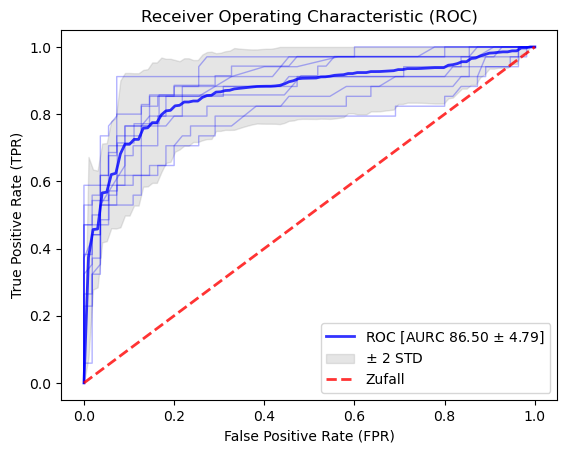

In [16]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [17]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

MLPClassifier(activation='logistic', alpha=0.0004736080452737105,
              hidden_layer_sizes=18, max_iter=16, random_state=0,
              solver='lbfgs')

In [18]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version) + '_' + opt + '_' + scoring
pk.dump(model, open(filename, 'wb'))

In [19]:
# Scaler speichern
#  (KNIME: "PMML Writer")
filename += '_scaler'
pk.dump(scaler, open(filename, 'wb'))

## Ergebnisse

#### Parameter

* Accuracy:  {'alpha': 0.0004736080452737105, 'hidden_layer_sizes': 18, 'max_iter': 16}
* Precision: {'alpha': 0.0007206326547259167, 'hidden_layer_sizes': 2,  'max_iter': 16}
* F1:        {'alpha': 0.0004736080452737105, 'hidden_layer_sizes': 18, 'max_iter': 16}
* ROC_AUC:   {'alpha': 0.0004736080452737105, 'hidden_layer_sizes': 18, 'max_iter': 16}

#### V10, MLP, HRS, Accuracy bzw. F1 bzw. ROC_AUC

Parameter

{'alpha': 0.0004736080452737105, 'hidden_layer_sizes': 18, 'max_iter': 16}

MLPClassifier(activation='logistic', alpha=0.0004736080452737105,
              hidden_layer_sizes=18, max_iter=16, random_state=0,
              solver='lbfgs')
              
Confusion Matrix

* TN (True  Negatives) : 495
* TP (True  Positives) : 239
* FN (False Negatives) : 103
* FP (False Positives) : 54

Gütemaße

* Genauigkeit  (Accuracy)    :   82,38 %
* Spezifität   (Specificity) :   90,16 %
* Sensitivität (Sensitivity) :   69,87 %
* Präzision    (Precision)   :   81,50 %
* Recall       (Recall)      :   69,87 %
* F-Maß        (F Score)     :   75,09 %
* AURC         (AURC)        :   86,64 %
* LogLoss      (LogLoss)     :    0,421

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,40 %

#### V10, MLP, HRS, Precision

Parameter

{'alpha': 0.0007206326547259167, 'hidden_layer_sizes': 2, 'max_iter': 16}

MLPClassifier(activation='logistic', alpha=0.0007206326547259167,
              hidden_layer_sizes=2, max_iter=16, random_state=0,
              solver='lbfgs')
              
Confusion Matrix

* TN (True  Negatives) : 492
* TP (True  Positives) : 243
* FN (False Negatives) : 99
* FP (False Positives) : 57

Gütemaße

* Genauigkeit  (Accuracy)    :   82,49 %
* Spezifität   (Specificity) :   89,62 %
* Sensitivität (Sensitivity) :   71,04 %
* Präzision    (Precision)   :   80,82 %
* Recall       (Recall)      :   71,04 %
* F-Maß        (F Score)     :   75,52 %
* AURC         (AURC)        :   86,78 %
* LogLoss      (LogLoss)     :    0,418

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,40 %
